Importing required libraries into the notebook

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
import string
import nltk 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from nltk.corpus import stopwords
stopword_list=stopwords.words('english')


Reading the dataset using read_csv function using pandas and checking for all the required details

In [52]:
pf = pd.read_csv('D:\\vs code\\Python\\Hacakathon\\Hackathon datasets\\justice.csv')
pf.head(10)

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
5,5,50644,Kleindienst v. Mandel,https://api.oyez.org/cases/1971/71-16,71-16,1971,"Richard G. Kleindienst, Attorney General of th...","Ernest E. Mandel, et al.",<p>Ernest E. Mandel was a Belgian professional...,2282,6,3,True,majority opinion,reversed,First Amendment
6,6,50655,Sarno v. Illinois Crime Investigating Commission,https://api.oyez.org/cases/1971/70-7,70-7,1971,Sarno,Illinois Crime Investigating Commission,<p>The Illinois Crime Investigating Commission...,1424,5,2,False,per curiam,NaN,Criminal Procedure
7,7,50656,Argersinger v. Hamlin,https://api.oyez.org/cases/1971/70-5015,70-5015,1971,Argersinger,Hamlin,<p>Jon Argersinger was an indigent charged wit...,347,9,0,True,majority opinion,reversed,Criminal Procedure
8,8,50657,Eisenstadt v. Baird,https://api.oyez.org/cases/1971/70-17,70-17,1971,Eisenstadt,Baird,<p>William Baird gave away Emko Vaginal Foam t...,420,6,1,False,majority opinion,affirmed,Privacy
9,9,50663,Gooding v. Wilson,https://api.oyez.org/cases/1971/70-26,70-26,1971,Gooding,Wilson,<p>A Georgia state court convicted Johnny Wils...,612,5,2,False,majority opinion,affirmed,First Amendment


In [53]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3303 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(11)


Droping extra Columns

In [54]:
pf_new = pf.drop(['Unnamed: 0', 'name', 'href', 'first_party', 'second_party'],  axis = 1)
pf_new.head()

,ID,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,50606,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,50613,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,50623,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,50632,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,50643,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [55]:
pf_new["term"].value_counts()

1997         97
1996         91
2009         87
2000         86
2005         86
             ..
1957         16
1959         10
1789-1850    10
1850-1900     8
1955          5
Name: term, Length: 70, dtype: int64

In [56]:
pf_new["decision_type"].value_counts()

majority opinion                     2829
per curiam                            267
plurality opinion                     153
equally divided                        17
dismissal - rule 46                     9
dismissal - other                       8
dismissal - improvidently granted       6
dismissal - moot                        5
memorandum                              1
opinion of the court                    1
Name: decision_type, dtype: int64

In [57]:
pf_new["disposition"].value_counts()

reversed/remanded            1073
affirmed                     1007
reversed                      585
vacated/remanded              430
reversed in-part/remanded      61
none                           41
reversed in-part               22
vacated                         7
vacated in-part/remanded        5
Name: disposition, dtype: int64

In [58]:
pf_new["issue_area"].value_counts()

Criminal Procedure      859
Civil Rights            568
Economic Activity       542
First Amendment         353
Judicial Power          342
Due Process             128
Federalism              125
Privacy                  70
Unions                   60
Federal Taxation         51
Attorneys                37
Miscellaneous            20
Private Action            4
Interstate Relations      2
Name: issue_area, dtype: int64

In [59]:
pf_new["first_party_winner"].value_counts()

True     2140
False    1148
Name: first_party_winner, dtype: int64

Filling the missing or NaN values using mode and other fillers (unknown, null, etc)

In [60]:
pf_new.isna()

,ID,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3298,False,False,False,False,False,False,False,False,False,False,False
3299,False,False,False,False,False,False,False,False,False,False,False
3300,False,False,False,False,False,False,False,False,False,False,False
3301,False,False,False,False,False,False,False,False,False,False,True


In [61]:
pf_new.isna().any()

ID                    False
docket                False
term                  False
facts                 False
facts_len             False
majority_vote         False
minority_vote         False
first_party_winner     True
decision_type          True
disposition            True
issue_area             True
dtype: bool

In [62]:
pf_new.isna().sum()

ID                      0
docket                  0
term                    0
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64

In [63]:
pf_new.describe()

,ID,facts_len,majority_vote,minority_vote
count,3303.000000,3303.000000,3303.000000,3303.000000
mean,56336.505298,1112.496821,7.009688,1.727823
std,3600.259018,531.514960,1.726244,1.604460
min,50606.000000,26.000000,0.000000,0.000000
25%,54339.500000,757.000000,5.000000,0.000000
50%,55260.000000,1049.000000,7.000000,2.000000
75%,59437.500000,1381.000000,9.000000,3.000000
max,63335.000000,6201.000000,9.000000,4.000000


In [64]:
pf_new.isnull()

,ID,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3298,False,False,False,False,False,False,False,False,False,False,False
3299,False,False,False,False,False,False,False,False,False,False,False
3300,False,False,False,False,False,False,False,False,False,False,False
3301,False,False,False,False,False,False,False,False,False,False,True


In [65]:
pf_new.dropna(axis = 0, thresh=3 , inplace = True)
pf_new

,ID,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,50606,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,50613,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,50623,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,50632,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,50643,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
...,...,...,...,...,...,...,...,...,...,...,...
3298,63324,20-437,2020,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,63323,20-5904,2020,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,63331,19-1414,2020,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,63332,142-orig,2020,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,NaN


In [66]:
pf_new["disposition"].fillna("unknown", inplace=True)
pf_new

,ID,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,50606,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,50613,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,50623,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,50632,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,50643,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
...,...,...,...,...,...,...,...,...,...,...,...
3298,63324,20-437,2020,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,63323,20-5904,2020,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,63331,19-1414,2020,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,63332,142-orig,2020,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,NaN


In [67]:
pf_new['first_party_winner'].fillna( pf_new['first_party_winner'].mode()[0], inplace = True)

In [68]:
pf_new["first_party_winner"].value_counts()

True     2155
False    1148
Name: first_party_winner, dtype: int64

In [69]:
pf_new["decision_type"].fillna(pf_new['decision_type'].mode()[0], inplace=True)
pf_new

,ID,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,50606,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,50613,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,50623,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,50632,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,50643,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
...,...,...,...,...,...,...,...,...,...,...,...
3298,63324,20-437,2020,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,63323,20-5904,2020,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,63331,19-1414,2020,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,63332,142-orig,2020,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,NaN


In [70]:
pf_new["decision_type"].value_counts()

majority opinion                     2836
per curiam                            267
plurality opinion                     153
equally divided                        17
dismissal - rule 46                     9
dismissal - other                       8
dismissal - improvidently granted       6
dismissal - moot                        5
memorandum                              1
opinion of the court                    1
Name: decision_type, dtype: int64

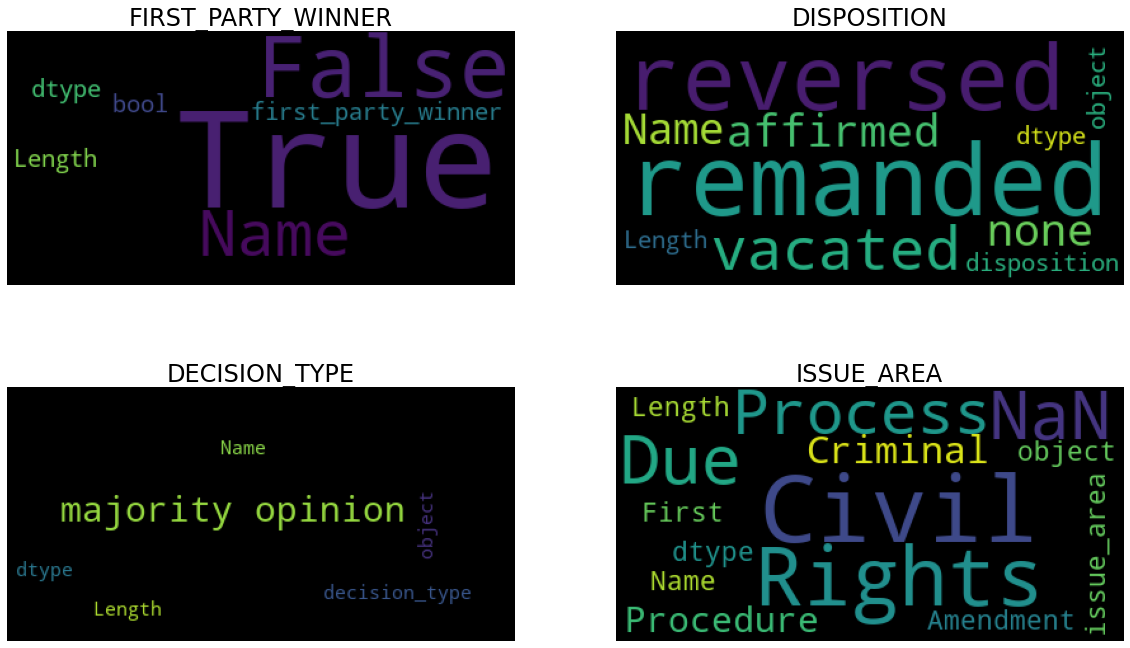

In [71]:
text_cols = ['first_party_winner', 'disposition', 'decision_type', 'issue_area']

import wordcloud as wc

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(pf_new[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

In [72]:
pf_new.isna().sum()

ID                      0
docket                  0
term                    0
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner      0
decision_type           0
disposition             0
issue_area            142
dtype: int64

In [73]:
pf_new["issue_area"].fillna(pf_new['issue_area'].mode()[0], inplace=True)
pf_new

,ID,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,50606,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,Criminal Procedure
1,50613,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,50623,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,50632,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,50643,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
...,...,...,...,...,...,...,...,...,...,...,...
3298,63324,20-437,2020,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,63323,20-5904,2020,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,63331,19-1414,2020,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,63332,142-orig,2020,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,Criminal Procedure


Finally verifying if all the missing values are successfully filled

In [74]:
pf_new.isna().sum()

ID                    0
docket                0
term                  0
facts                 0
facts_len             0
majority_vote         0
minority_vote         0
first_party_winner    0
decision_type         0
disposition           0
issue_area            0
dtype: int64

Analysing data using seaborn, pyploy.express and matplotlib graphs

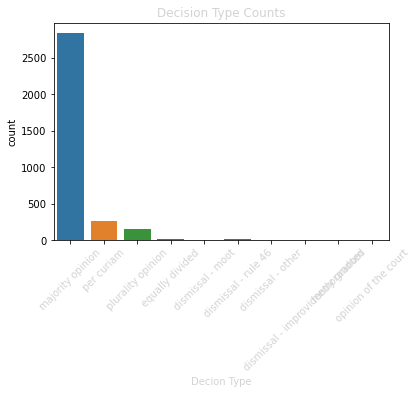

In [75]:
g=sns.countplot(x='decision_type',data=pf_new)

g.set_xticklabels(g.get_xticklabels(),rotation=45, color ='lightgray') 
plt.title("Decision Type Counts",color='lightgray')
plt.xlabel("Decion Type",color='lightgray')
plt.show()

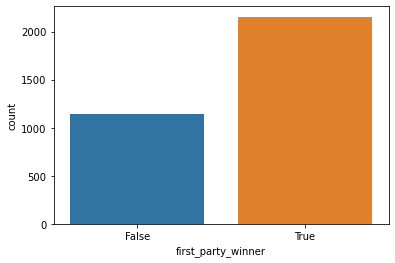

In [76]:
sns.countplot(x='first_party_winner',data=pf_new)
plt.show()

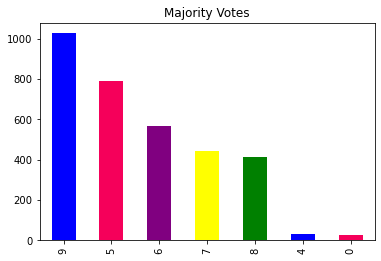

In [77]:
pf_new["majority_vote"].value_counts().plot.bar(color=['blue', '#f5005a', 'purple', 'yellow', 'green'], title='Majority Votes');

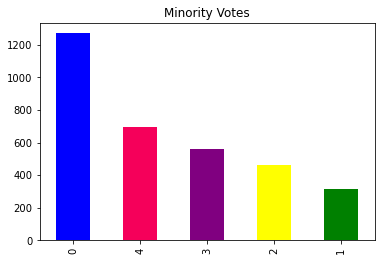

In [78]:
pf_new["minority_vote"].value_counts().plot.bar(color=['blue', '#f5005a', 'purple', 'yellow', 'green'], title='Minority Votes');

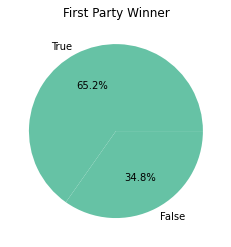

In [79]:
color = plt.cm.Set2(np.linspace(0,1,20))
pf_new["first_party_winner"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="term",colors=color,autopct="%0.1f%%")
plt.title("First Party Winner")
plt.axis("off")
plt.show()

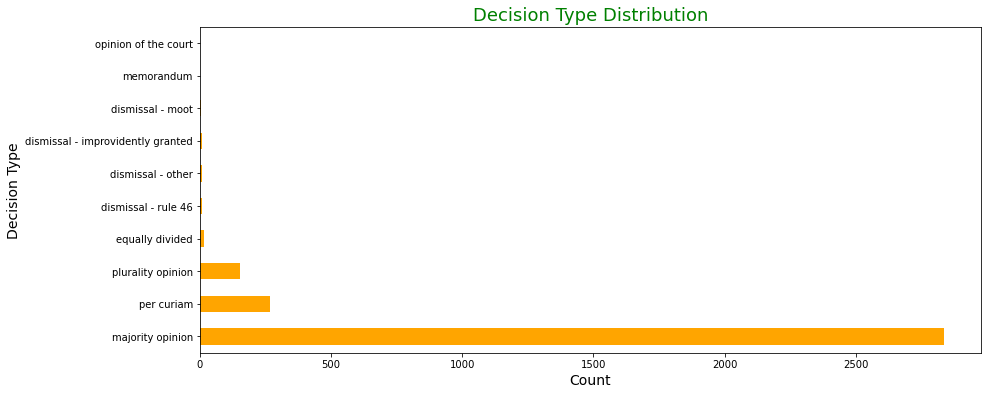

In [80]:
ax = pf_new['decision_type'].value_counts().plot.barh(figsize=(14, 6), color='orange')
ax.set_title('Decision Type Distribution',color='green', size=18)
ax.set_ylabel('Decision Type', size=14)
ax.set_xlabel('Count', size=14);

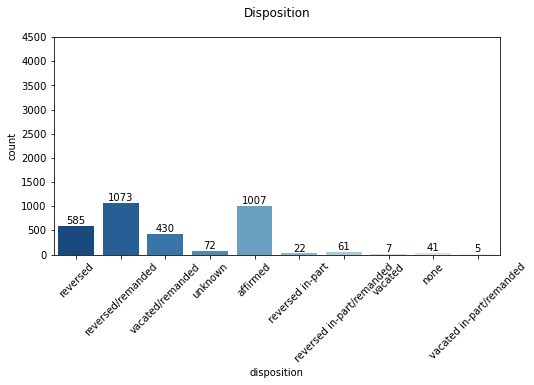

In [81]:
plt.figure(figsize = (8, 4))
ax = sns.countplot(data = pf_new,
                   x = 'disposition',
                   palette = 'Blues_r')

ax.bar_label(ax.containers[0])
ax.set_ylim(0, 4500)
ax.set_title('Disposition', pad = 20)
plt.xticks(rotation=45)

plt.show()

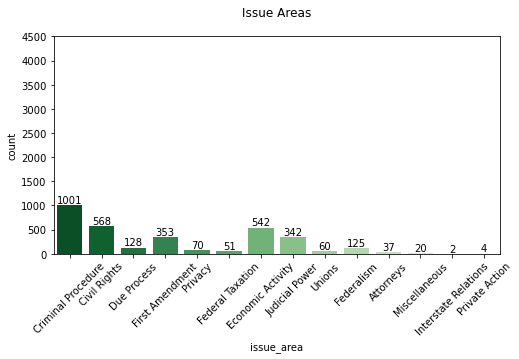

In [82]:
plt.figure(figsize = (8, 4))
ax = sns.countplot(data = pf_new,
                   x = 'issue_area',
                   palette = 'Greens_r')

ax.bar_label(ax.containers[0])
ax.set_ylim(0, 4500)
ax.set_title('Issue Areas', pad = 20)
plt.xticks(rotation=45)

plt.show()

In [83]:
import plotly.express as px

fig = px.bar(pf_new[['decision_type','issue_area', 'disposition']].sort_values('issue_area', ascending=False), 
                        y = "issue_area", x= "decision_type", color='disposition', template='ggplot2')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
fig.update_layout(title_text="Decisions Types by Issue Areas")

fig.show()

In [84]:
import string

In [85]:
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)    #removes puntuations
    return str(text).translate(translator)
def processRequest(requestStr): 
    requestStr=remove_punctuations(requestStr)    # removes repeated letters
    return requestStr

extracting data from <#p><#/p> using get.text()

In [86]:
from bs4 import BeautifulSoup
pf_new['factsc'] = [BeautifulSoup(text).get_text() for text in pf_new['facts']]

In [87]:
pd.options.mode.chained_assignment = None   #Exception Handling

In [88]:
pf_new['facts']=pf_new['facts'].str.lower().apply(lambda x:processRequest(x))

In [89]:
pf_new['facts'].head()

0    pin 1970 jane roe a fictional name used in cou...
1    pjoan stanley had three children with peter st...
2    pjohn giglio was convicted of passing forged m...
3    pthe idaho probate code specified that males m...
4    pmiller after conducting a mass mailing campai...
Name: facts, dtype: object

In [90]:
#LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels to numerical labels
from sklearn import preprocessing
pro= preprocessing.LabelEncoder()   
y=pro.fit_transform(pf_new['first_party_winner'])

In [91]:
vect = TfidfVectorizer(min_df=0.0001, max_df=0.95,stop_words=stopword_list)
vect.fit(pf_new.facts)            # building vocabulary
X = vect.transform(pf_new.facts)  # encoding the text data

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [93]:

model=LinearSVC()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.43      0.20      0.27       242
           1       0.65      0.85      0.73       419

    accuracy                           0.61       661
   macro avg       0.54      0.52      0.50       661
weighted avg       0.57      0.61      0.56       661



In [94]:
model=XGBClassifier()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.46      0.25      0.32       242
           1       0.66      0.83      0.73       419

    accuracy                           0.62       661
   macro avg       0.56      0.54      0.53       661
weighted avg       0.58      0.62      0.58       661



In [95]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.06      0.11       242
           1       0.64      0.98      0.78       419

    accuracy                           0.64       661
   macro avg       0.66      0.52      0.44       661
weighted avg       0.65      0.64      0.53       661

